# Paired Sample T-test : 전후 차이 비교

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

In [3]:
font_location = "C:/Windows/Fonts/NanumBarunGothic.ttf"

In [4]:
font_name = font_manager.FontProperties(fname=font_location).get_name()
print(font_name)

NanumBarunGothic


In [5]:
rc('font', family="NanumBarunGothic")

## 전후 차이 비교를 위한 샘플데이터(2018년 생생정보통, 수요미식회, 맛있는녀석들) 전처리

In [6]:
df = pd.read_csv('raw_data/2017.csv')

In [7]:
df.head()

,방송,식당,방영일,포스팅일,제목,포스팅주소,days_diff,방영전,방영후
0,생생정보통,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,0,1
1,생생정보통,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,0,1
2,생생정보통,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,1,0
3,생생정보통,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,0,1
4,생생정보통,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,0,1


In [8]:
paired = pd.DataFrame(df.groupby('식당')['방영전', '방영후'].sum()).reset_index()

In [9]:
paired

,식당,방영전,방영후
0,136생고기,18,72
1,갈비구락부,66,69
2,갓포치유,41,109
3,강릉감자옹심이,268,422
4,강릉아구찜,90,165
5,강촌 숯불 닭갈비,96,204
6,강촌원조쭈꾸미,13,70
7,강화해신탕,35,57
8,개미집,369,631
9,개화옥,30,96


In [10]:
paired.loc[paired['방영전']-paired['방영후'] > 0]

,식당,방영전,방영후
11,갯바위,510,490
24,그릭슈바인,416,394
61,동명항게찜,257,223
63,두메향기 산,207,138
72,류재은베이커리,392,378
78,먹깨비,526,474
80,메이탄,504,496
85,무등산,524,476
92,바다회사랑,509,421
113,사돈집,219,201


In [11]:
paired[['방영전','방영후']].describe()

,방영전,방영후
count,246.000000,246.000000
mean,169.121951,228.589431
std,180.621448,197.227306
min,0.000000,2.000000
25%,22.000000,63.250000
50%,74.500000,148.500000
75%,334.750000,397.000000
max,566.000000,665.000000


**평균값을 보았을 때, 방영전후 차이가 있음**

### outlier 확인

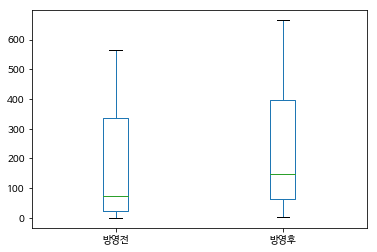

In [12]:
paired[['방영전', '방영후']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('paired_t-test_boxplot_outliers.png')

outlier는 없어보임

### 정규성 검정

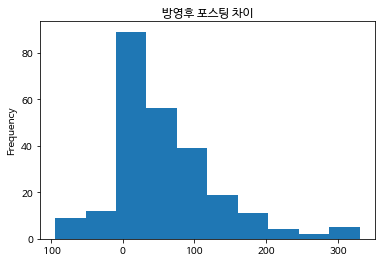

In [14]:
paired['post_diff'] = paired['방영후'] - paired['방영전']

paired['post_diff'].plot(kind='hist', title= '방영후 포스팅 차이')

Text(0.5,1,'Posting Difference Q-Q Plot')

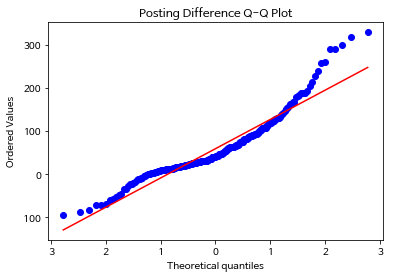

In [15]:
stats.probplot(paired['post_diff'], plot= plt)
plt.title('Posting Difference Q-Q Plot')

In [16]:
stats.shapiro(paired['post_diff'])

(0.915074348449707, 1.273284394587293e-10)

**정규성은 만족 안하지만 데이터가 많으므로(>30) 일단 정규성을 가정하고 넘어가자..**

## Paired sample t-test

In [17]:
stats.ttest_rel(paired['방영전'], paired['방영후'])

Ttest_relResult(statistic=-13.176875319957249, pvalue=2.4785176989630276e-30)

**pvalue < 0.05이므로 맛집 프로그램 방영전과 방영후 포스팅 차이가 있다고 말할 수 있음**